# 2. 单层神经网络与激活函数

> 激活函数是神经网络的灵魂 | 从线性到非线性的跨越

---

## 📚 本章目标

**学习目标：**
- 🔢 理解单层神经网络的数学模型
- 🧮 掌握6种常见激活函数（Sigmoid、Tanh、ReLU、Leaky ReLU、ELU、GELU）
- 💡 理解为什么需要非线性激活函数
- 🎯 学会为不同任务选择合适的激活函数
- 💻 从零实现各种激活函数

**实战项目：**
- 激活函数可视化对比
- 二分类问题（鸢尾花数据集）
- 多分类问题（手写数字数据集）
- Softmax + 交叉熵损失

---

In [13]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# 设置随机种子，确保结果可复现
np.random.seed(42)

# 设置绘图风格
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.sans-serif'] = [
        'Arial Unicode MS',  # macOS通用
        'PingFang SC',       # macOS系统字体
        'STHeiti',           # 华文黑体
        'Heiti TC',          # 黑体-繁
        'SimHei',            # 黑体
    ]
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

print("✅ 环境准备完成！")

✅ 环境准备完成！


---

## 1. 单层神经网络的数学模型

### 1.1 网络结构

**单层神经网络**（也称为单层感知机）由以下部分组成：

```
输入层 (n个特征)  →  输出层 (k个神经元)
```

**数学定义：**

对于输入向量 $\mathbf{x} \in \mathbb{R}^n$：

1. **线性变换（加权求和）：**
   $$\mathbf{z} = \mathbf{W} \mathbf{x} + \mathbf{b}$$
   
   其中：
   - $\mathbf{W} \in \mathbb{R}^{k \times n}$: 权重矩阵
   - $\mathbf{b} \in \mathbb{R}^k$: 偏置向量
   - $\mathbf{z} \in \mathbb{R}^k$: 线性输出（也称为logits或未激活值）

2. **非线性激活：**
   $$\mathbf{y} = f(\mathbf{z})$$
   
   其中 $f$ 是**激活函数**（activation function）

### 1.2 为什么需要激活函数？

**没有激活函数会怎样？**

假设我们有一个2层网络，但**不使用激活函数**：

$$
\begin{align*}
\mathbf{h} &= \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1 \\
\mathbf{y} &= \mathbf{W}_2 \mathbf{h} + \mathbf{b}_2 \\
           &= \mathbf{W}_2 (\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1) + \mathbf{b}_2 \\
           &= (\mathbf{W}_2 \mathbf{W}_1) \mathbf{x} + (\mathbf{W}_2 \mathbf{b}_1 + \mathbf{b}_2)
\end{align*}
$$

令 $\mathbf{W}' = \mathbf{W}_2 \mathbf{W}_1$，$\mathbf{b}' = \mathbf{W}_2 \mathbf{b}_1 + \mathbf{b}_2$，则：

$$\mathbf{y} = \mathbf{W}' \mathbf{x} + \mathbf{b}'$$

**结论：** 多层线性变换等价于单层线性变换！

**因此：**
- ❌ 没有激活函数 → 无论多少层都等价于单层 → 无法学习复杂函数
- ✅ 有激活函数 → 引入非线性 → 可以逼近任意复杂函数

---

In [3]:
# 演示：多层线性变换的等价性

# 定义一个简单的2层线性网络
n_input = 3
n_hidden = 4
n_output = 2

# 随机初始化权重
W1 = np.random.randn(n_hidden, n_input)
b1 = np.random.randn(n_hidden)
W2 = np.random.randn(n_output, n_hidden)
b2 = np.random.randn(n_output)

# 测试输入
x = np.random.randn(n_input)

# 方法1: 2层线性变换
h = W1 @ x + b1  # 第一层
y_2layer = W2 @ h + b2  # 第二层

# 方法2: 合并为单层
W_combined = W2 @ W1  # 合并权重
b_combined = W2 @ b1 + b2  # 合并偏置
y_1layer = W_combined @ x + b_combined

# 验证等价性
print("2层线性网络的输出:")
print(y_2layer)
print("\n等价的单层网络输出:")
print(y_1layer)
print("\n两者差异（应接近0）:")
print(np.abs(y_2layer - y_1layer))
print(f"\n最大差异: {np.max(np.abs(y_2layer - y_1layer)):.10f}")

print("\n💡 结论: 多层线性变换完全等价于单层！")
print("因此，激活函数（非线性）是必不可少的。")

2层线性网络的输出:
[3.32645648 1.13682022]

等价的单层网络输出:
[3.32645648 1.13682022]

两者差异（应接近0）:
[8.8817842e-16 4.4408921e-16]

最大差异: 0.0000000000

💡 结论: 多层线性变换完全等价于单层！
因此，激活函数（非线性）是必不可少的。


---

## 2. 常见激活函数详解

### 2.1 Sigmoid函数

**定义：**
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**性质：**
- 输出范围: $(0, 1)$
- 形状: S形曲线
- 中心: $\sigma(0) = 0.5$

**导数：**
$$\sigma'(z) = \sigma(z)(1 - \sigma(z))$$

**优点：**
- ✅ 输出可以解释为概率（二分类）
- ✅ 平滑可导

**缺点：**
- ❌ **梯度消失**：当 $|z|$ 很大时，导数接近0
- ❌ **非零中心**：输出不是以0为中心，影响收敛速度
- ❌ **计算代价高**：涉及指数运算

**适用场景：**
- 二分类的输出层
- LSTM等循环网络的门控机制

---

In [4]:
# 从零实现Sigmoid函数及其导数

def sigmoid(z):
    """
    Sigmoid激活函数
    
    公式: σ(z) = 1 / (1 + e^(-z))
    
    参数:
        z: 输入，可以是标量、向量或矩阵
    
    返回:
        激活值，形状与z相同
    """
    return 1 / (1 + np.exp(-z))


def sigmoid_derivative(z):
    """
    Sigmoid函数的导数
    
    公式: σ'(z) = σ(z) * (1 - σ(z))
    
    参数:
        z: 输入
    
    返回:
        导数值
    """
    s = sigmoid(z)
    return s * (1 - s)


# 测试
z_test = np.array([-2, -1, 0, 1, 2])
print("输入 z:", z_test)
print("sigmoid(z):", sigmoid(z_test))
print("sigmoid'(z):", sigmoid_derivative(z_test))

print("\n✅ Sigmoid函数实现完成！")

输入 z: [-2 -1  0  1  2]
sigmoid(z): [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
sigmoid'(z): [0.10499359 0.19661193 0.25       0.19661193 0.10499359]

✅ Sigmoid函数实现完成！


### 2.2 Tanh函数（双曲正切）

**定义：**
$$\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}} = 2\sigma(2z) - 1$$

**性质：**
- 输出范围: $(-1, 1)$
- 形状: S形曲线
- 中心: $\tanh(0) = 0$ （零中心）

**导数：**
$$\tanh'(z) = 1 - \tanh^2(z)$$

**优点：**
- ✅ **零中心**：输出以0为中心，收敛更快
- ✅ 比Sigmoid梯度更大

**缺点：**
- ❌ 仍存在**梯度消失**问题
- ❌ 计算代价高

**适用场景：**
- 隐藏层激活函数（比Sigmoid更常用）
- RNN、LSTM

---

In [7]:
# 从零实现Tanh函数

def tanh(z):
    """
    Tanh激活函数
    
    公式: tanh(z) = (e^z - e^(-z)) / (e^z + e^(-z))
    
    参数:
        z: 输入
    
    返回:
        激活值
    """
    return np.tanh(z)  # NumPy内置实现
    # 或者手动实现:
    # return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))


def tanh_derivative(z):
    """
    Tanh函数的导数
    
    公式: tanh'(z) = 1 - tanh^2(z)
    
    参数:
        z: 输入
    
    返回:
        导数值
    """
    t = tanh(z)
    return 1 - t**2


# 测试
print("输入 z:", z_test)
print("tanh(z):", tanh(z_test))
print("tanh'(z):", tanh_derivative(z_test))

print("\n✅ Tanh函数实现完成！")

输入 z: [-2 -1  0  1  2]
tanh(z): [-0.96402758 -0.76159416  0.          0.76159416  0.96402758]
tanh'(z): [0.07065082 0.41997434 1.         0.41997434 0.07065082]

✅ Tanh函数实现完成！


### 2.3 ReLU（Rectified Linear Unit）

**定义：**
$$\text{ReLU}(z) = \max(0, z) = \begin{cases}
z, & \text{if } z > 0 \\
0, & \text{if } z \leq 0
\end{cases}$$

**性质：**
- 输出范围: $[0, +\infty)$
- 形状: 分段线性

**导数：**
$$\text{ReLU}'(z) = \begin{cases}
1, & \text{if } z > 0 \\
0, & \text{if } z \leq 0
\end{cases}$$

**优点：**
- ✅ **计算高效**：只需简单的阈值比较
- ✅ **缓解梯度消失**：正区域梯度恒为1
- ✅ **稀疏激活**：约50%的神经元被抑制（输出0）
- ✅ **收敛速度快**

**缺点：**
- ❌ **Dead ReLU问题**：负区域梯度为0，某些神经元可能永久"死亡"
- ❌ **非零中心**

**适用场景：**
- ✅ **隐藏层的默认选择**（现代深度学习的标配）
- CNN、深度神经网络

---

In [8]:
# 从零实现ReLU函数

def relu(z):
    """
    ReLU激活函数
    
    公式: ReLU(z) = max(0, z)
    
    参数:
        z: 输入
    
    返回:
        激活值
    """
    return np.maximum(0, z)


def relu_derivative(z):
    """
    ReLU函数的导数
    
    公式: ReLU'(z) = 1 if z > 0 else 0
    
    参数:
        z: 输入
    
    返回:
        导数值
    """
    return (z > 0).astype(float)


# 测试
print("输入 z:", z_test)
print("ReLU(z):", relu(z_test))
print("ReLU'(z):", relu_derivative(z_test))

print("\n✅ ReLU函数实现完成！")

输入 z: [-2 -1  0  1  2]
ReLU(z): [0 0 0 1 2]
ReLU'(z): [0. 0. 0. 1. 1.]

✅ ReLU函数实现完成！


### 2.4 Leaky ReLU

**定义：**
$$\text{Leaky ReLU}(z) = \begin{cases}
z, & \text{if } z > 0 \\
\alpha z, & \text{if } z \leq 0
\end{cases}$$

其中 $\alpha$ 是一个小的常数（通常为0.01）

**性质：**
- 输出范围: $(-\infty, +\infty)$

**导数：**
$$\text{Leaky ReLU}'(z) = \begin{cases}
1, & \text{if } z > 0 \\
\alpha, & \text{if } z \leq 0
\end{cases}$$

**优点：**
- ✅ **解决Dead ReLU问题**：负区域仍有小梯度
- ✅ 计算高效

**缺点：**
- ❌ $\alpha$ 需要手动调整

**适用场景：**
- 担心Dead ReLU问题时的替代方案

---

In [9]:
# 从零实现Leaky ReLU

def leaky_relu(z, alpha=0.01):
    """
    Leaky ReLU激活函数
    
    公式: Leaky ReLU(z) = z if z > 0 else alpha * z
    
    参数:
        z: 输入
        alpha: 负区域的斜率，默认0.01
    
    返回:
        激活值
    """
    return np.where(z > 0, z, alpha * z)


def leaky_relu_derivative(z, alpha=0.01):
    """
    Leaky ReLU函数的导数
    
    公式: Leaky ReLU'(z) = 1 if z > 0 else alpha
    
    参数:
        z: 输入
        alpha: 负区域的斜率
    
    返回:
        导数值
    """
    return np.where(z > 0, 1, alpha)


# 测试
print("输入 z:", z_test)
print("Leaky ReLU(z):", leaky_relu(z_test))
print("Leaky ReLU'(z):", leaky_relu_derivative(z_test))

print("\n✅ Leaky ReLU函数实现完成！")

输入 z: [-2 -1  0  1  2]
Leaky ReLU(z): [-0.02 -0.01  0.    1.    2.  ]
Leaky ReLU'(z): [0.01 0.01 0.01 1.   1.  ]

✅ Leaky ReLU函数实现完成！


### 2.5 ELU（Exponential Linear Unit）

**定义：**
$$\text{ELU}(z) = \begin{cases}
z, & \text{if } z > 0 \\
\alpha (e^z - 1), & \text{if } z \leq 0
\end{cases}$$

通常 $\alpha = 1.0$

**性质：**
- 输出范围: $(-\alpha, +\infty)$
- 负区域平滑

**导数：**
$$\text{ELU}'(z) = \begin{cases}
1, & \text{if } z > 0 \\
\text{ELU}(z) + \alpha, & \text{if } z \leq 0
\end{cases}$$

**优点：**
- ✅ 负区域有均值接近0的输出（减少偏移）
- ✅ 避免Dead ReLU
- ✅ 平滑可导

**缺点：**
- ❌ 计算代价高（指数运算）

**适用场景：**
- 需要负值输出的场景

---

In [10]:
# 从零实现ELU

def elu(z, alpha=1.0):
    """
    ELU激活函数
    
    公式: ELU(z) = z if z > 0 else alpha * (exp(z) - 1)
    
    参数:
        z: 输入
        alpha: 负区域的缩放因子，默认1.0
    
    返回:
        激活值
    """
    return np.where(z > 0, z, alpha * (np.exp(z) - 1))


def elu_derivative(z, alpha=1.0):
    """
    ELU函数的导数
    
    公式: ELU'(z) = 1 if z > 0 else ELU(z) + alpha
    
    参数:
        z: 输入
        alpha: 负区域的缩放因子
    
    返回:
        导数值
    """
    return np.where(z > 0, 1, elu(z, alpha) + alpha)


# 测试
print("输入 z:", z_test)
print("ELU(z):", elu(z_test))
print("ELU'(z):", elu_derivative(z_test))

print("\n✅ ELU函数实现完成！")

输入 z: [-2 -1  0  1  2]
ELU(z): [-0.86466472 -0.63212056  0.          1.          2.        ]
ELU'(z): [0.13533528 0.36787944 1.         1.         1.        ]

✅ ELU函数实现完成！


### 2.6 GELU（Gaussian Error Linear Unit）

**定义：**
$$\text{GELU}(z) = z \cdot \Phi(z)$$

其中 $\Phi(z)$ 是标准正态分布的累积分布函数（CDF）。

**近似计算：**
$$\text{GELU}(z) \approx 0.5z \left(1 + \tanh\left[\sqrt{\frac{2}{\pi}}\left(z + 0.044715z^3\right)\right]\right)$$

**性质：**
- 平滑、非单调
- 结合了ReLU和Dropout的思想

**优点：**
- ✅ 在Transformer、BERT等模型中表现优异
- ✅ 平滑可导

**缺点：**
- ❌ 计算代价较高

**适用场景：**
- Transformer、BERT、GPT等现代NLP模型

---

In [11]:
# 从零实现GELU（近似版本）

def gelu(z):
    """
    GELU激活函数（近似实现）
    
    公式: GELU(z) ≈ 0.5 * z * (1 + tanh(sqrt(2/π) * (z + 0.044715 * z^3)))
    
    参数:
        z: 输入
    
    返回:
        激活值
    """
    return 0.5 * z * (1 + np.tanh(np.sqrt(2 / np.pi) * (z + 0.044715 * z**3)))


def gelu_derivative(z):
    """
    GELU函数的导数（数值近似）
    
    参数:
        z: 输入
    
    返回:
        导数值
    """
    # 数值微分（简化实现）
    epsilon = 1e-7
    return (gelu(z + epsilon) - gelu(z)) / epsilon


# 测试
print("输入 z:", z_test)
print("GELU(z):", gelu(z_test))
print("GELU'(z):", gelu_derivative(z_test))

print("\n✅ GELU函数实现完成！")

输入 z: [-2 -1  0  1  2]
GELU(z): [-0.04540231 -0.15880801  0.          0.84119199  1.95459769]
GELU'(z): [-0.08609926 -0.08296407  0.50000004  1.0829641   1.08609925]

✅ GELU函数实现完成！


---

## 3. 激活函数可视化对比

让我们可视化所有激活函数及其导数，直观理解它们的特性。

---

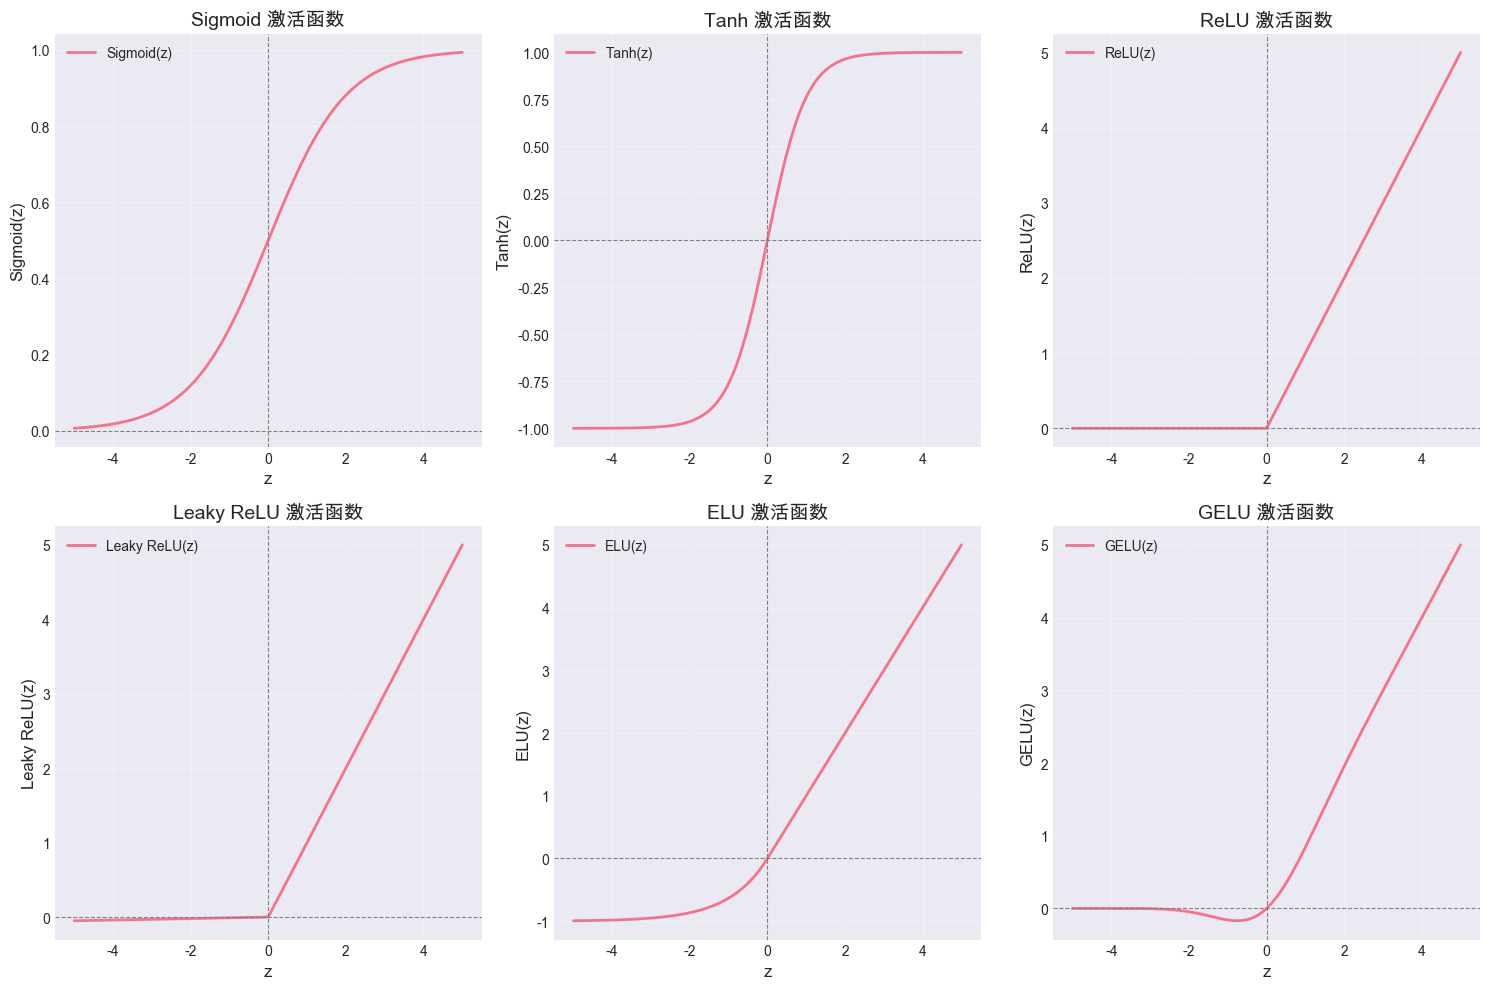

📊 观察要点:
  - Sigmoid和Tanh: S形曲线，输出范围有界
  - ReLU及其变体: 分段线性，正区域斜率为1
  - GELU: 平滑非单调


In [14]:
# 可视化所有激活函数

z = np.linspace(-5, 5, 200)

# 计算所有激活函数的值
activations = {
    'Sigmoid': sigmoid(z),
    'Tanh': tanh(z),
    'ReLU': relu(z),
    'Leaky ReLU': leaky_relu(z),
    'ELU': elu(z),
    'GELU': gelu(z)
}

derivatives = {
    'Sigmoid': sigmoid_derivative(z),
    'Tanh': tanh_derivative(z),
    'ReLU': relu_derivative(z),
    'Leaky ReLU': leaky_relu_derivative(z),
    'ELU': elu_derivative(z),
    'GELU': gelu_derivative(z)
}

# 绘制激活函数
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (name, values) in enumerate(activations.items()):
    ax = axes[idx]
    ax.plot(z, values, linewidth=2, label=f'{name}(z)')
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)
    ax.set_xlabel('z', fontsize=12)
    ax.set_ylabel(f'{name}(z)', fontsize=12)
    ax.set_title(f'{name} 激活函数', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

print("📊 观察要点:")
print("  - Sigmoid和Tanh: S形曲线，输出范围有界")
print("  - ReLU及其变体: 分段线性，正区域斜率为1")
print("  - GELU: 平滑非单调")

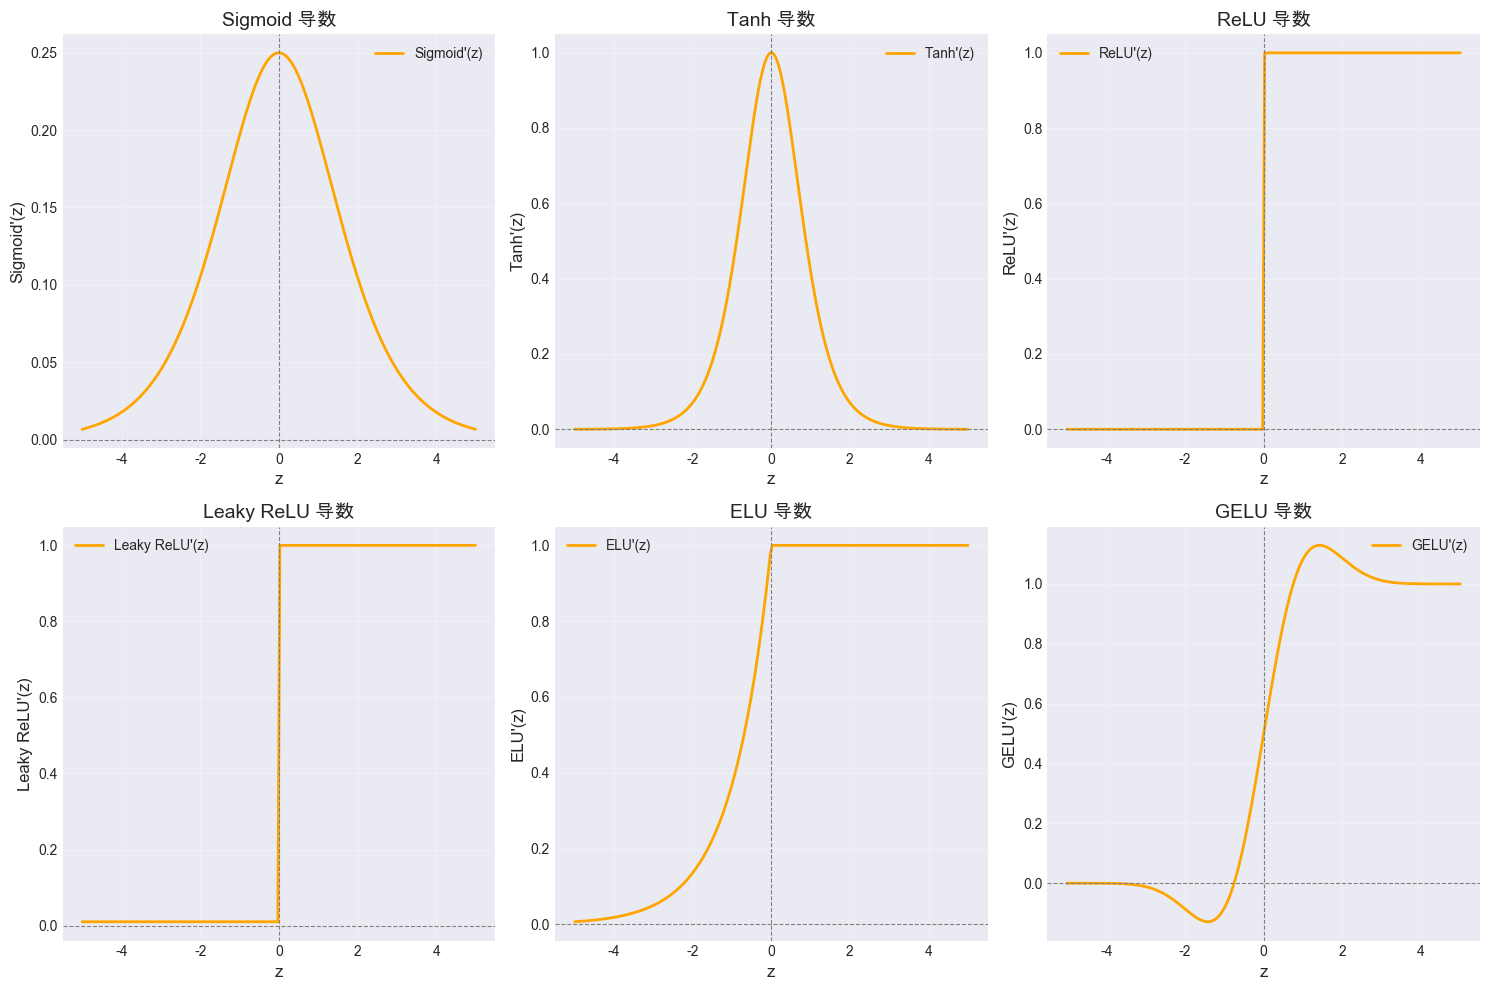

📊 梯度消失问题分析:
  - Sigmoid和Tanh: 当|z|很大时，导数接近0 → 梯度消失
  - ReLU: 正区域导数恒为1 → 缓解梯度消失
  - Leaky ReLU/ELU: 负区域也有梯度 → 避免Dead ReLU


In [15]:
# 可视化所有激活函数的导数

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (name, deriv) in enumerate(derivatives.items()):
    ax = axes[idx]
    ax.plot(z, deriv, linewidth=2, label=f"{name}'(z)", color='orange')
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)
    ax.set_xlabel('z', fontsize=12)
    ax.set_ylabel(f"{name}'(z)", fontsize=12)
    ax.set_title(f'{name} 导数', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

print("📊 梯度消失问题分析:")
print("  - Sigmoid和Tanh: 当|z|很大时，导数接近0 → 梯度消失")
print("  - ReLU: 正区域导数恒为1 → 缓解梯度消失")
print("  - Leaky ReLU/ELU: 负区域也有梯度 → 避免Dead ReLU")

---

## 4. 激活函数选择指南

### 4.1 不同层的选择

**隐藏层：**
- ✅ **首选：ReLU** - 计算高效，收敛快（深度学习默认选择）
- 🔄 **备选：Leaky ReLU** - 避免Dead ReLU问题
- 🔄 **备选：ELU** - 需要负值输出时
- 🔄 **备选：GELU** - Transformer等现代架构

**输出层：**
- **二分类** → Sigmoid（输出概率）
- **多分类** → Softmax（输出概率分布）
- **回归** → 线性（无激活函数）或根据输出范围选择

### 4.2 对比总结

| 激活函数 | 输出范围 | 梯度消失 | 计算速度 | 适用场景 |
|---------|---------|---------|---------|----------|
| Sigmoid | (0, 1) | ❌ 严重 | 慢 | 二分类输出层 |
| Tanh | (-1, 1) | ❌ 较严重 | 慢 | RNN、LSTM |
| ReLU | [0, ∞) | ✅ 缓解 | 快 | ✅ 隐藏层首选 |
| Leaky ReLU | (-∞, ∞) | ✅ 缓解 | 快 | Dead ReLU问题 |
| ELU | (-α, ∞) | ✅ 缓解 | 中等 | 需要负值输出 |
| GELU | (-∞, ∞) | ✅ 缓解 | 中等 | Transformer |

---

#### 💡 直观类比：选举投票

想象10个候选人参加选举，`z`是他们的"支持度分数"：

**Softmax的工作流程：**

1. **指数化** $e^{z_i}$ = 把线性支持度转换为"票数"
   - 支持度高的候选人获得指数级增长的票数
   - 支持度3.2的候选人比支持度1.0的候选人获得 $e^{3.2}/e^{1.0} \approx 9$ 倍的票数

2. **归一化** $\frac{e^{z_i}}{\sum e^{z_j}}$ = 计算每个候选人的"得票率"
   - 所有得票率加起来必须是100%（即1.0）

3. **竞争效应** = 支持度最高的候选人获得最高的得票率
   - 但不是"赢者通吃"，其他候选人也有机会（保留不确定性）

**这就是Softmax！** 它将任意实数（logits）转换为有意义的概率分布。

---

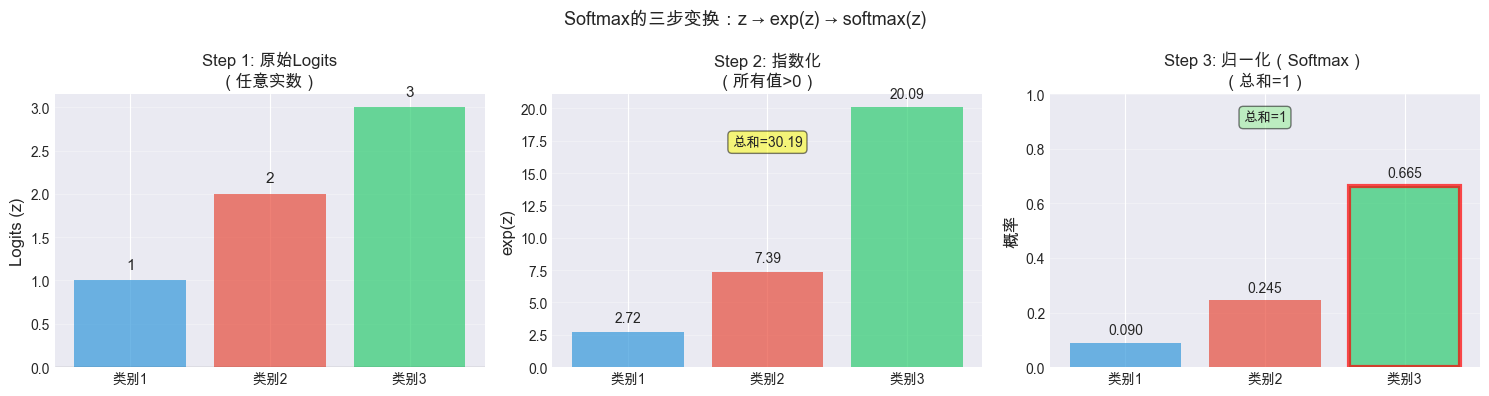

💡 关键观察：
  - Step 1→2：指数化让所有值变为正数，但放大了差异
  - Step 2→3：归一化让总和变为1，得到概率分布
  - 最大的z值（红框）获得最大的概率


In [19]:
# 可视化Softmax的三步变换过程
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

categories = ['类别1', '类别2', '类别3']
colors = ['#3498db', '#e74c3c', '#2ecc71']

# Step 1: 原始logits
ax = axes[0]
bars = ax.bar(categories, z_example, color=colors, alpha=0.7)
ax.axhline(0, color='black', linestyle='-', linewidth=0.8)
ax.set_ylabel('Logits (z)', fontsize=12)
ax.set_title('Step 1: 原始Logits\n（任意实数）', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{z_example[i]:.0f}', ha='center', va='bottom', fontsize=11)

# Step 2: 指数化
ax = axes[1]
bars = ax.bar(categories, exp_z, color=colors, alpha=0.7)
ax.set_ylabel('exp(z)', fontsize=12)
ax.set_title('Step 2: 指数化\n（所有值>0）', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{exp_z[i]:.2f}', ha='center', va='bottom', fontsize=10)
# 标注总和
ax.text(1, np.max(exp_z)*0.85, f'总和={sum_exp_z:.2f}',
        ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# Step 3: 归一化
ax = axes[2]
bars = ax.bar(categories, softmax_z, color=colors, alpha=0.7)
# 高亮最大值
max_idx = np.argmax(softmax_z)
bars[max_idx].set_edgecolor('red')
bars[max_idx].set_linewidth(3)
ax.set_ylabel('概率', fontsize=12)
ax.set_title('Step 3: 归一化（Softmax）\n（总和=1）', fontsize=12, fontweight='bold')
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3, axis='y')
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{softmax_z[i]:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
# 标注总和=1
ax.text(1, 0.9, f'总和={np.sum(softmax_z):.0f}',
        ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.suptitle('Softmax的三步变换：z → exp(z) → softmax(z)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print("💡 关键观察：")
print("  - Step 1→2：指数化让所有值变为正数，但放大了差异")
print("  - Step 2→3：归一化让总和变为1，得到概率分布")
print("  - 最大的z值（红框）获得最大的概率")

In [18]:
# 手算示例：Softmax的完整计算过程

print("="*70)
print("🧮 手算示例：Softmax完整计算过程")
print("="*70)

# 给定logits
z_example = np.array([1, 2, 3])
print(f"\n输入 z = {z_example}")

# Step 1: 计算指数
print(f"\n【Step 1】计算指数 e^z")
print(f"  e^1 ≈ {np.exp(1):.2f}")
print(f"  e^2 ≈ {np.exp(2):.2f}")
print(f"  e^3 ≈ {np.exp(3):.2f}")

exp_z = np.exp(z_example)
print(f"  exp(z) = {exp_z}")

# Step 2: 求和
print(f"\n【Step 2】求和")
sum_exp_z = np.sum(exp_z)
print(f"  sum = {exp_z[0]:.2f} + {exp_z[1]:.2f} + {exp_z[2]:.2f} = {sum_exp_z:.2f}")

# Step 3: 归一化
print(f"\n【Step 3】归一化（除以总和）")
softmax_z = exp_z / sum_exp_z
print(f"  p_1 = {exp_z[0]:.2f} / {sum_exp_z:.2f} ≈ {softmax_z[0]:.4f}")
print(f"  p_2 = {exp_z[1]:.2f} / {sum_exp_z:.2f} ≈ {softmax_z[1]:.4f}")
print(f"  p_3 = {exp_z[2]:.2f} / {sum_exp_z:.2f} ≈ {softmax_z[2]:.4f}")

# 验证
print(f"\n【验证】")
print(f"  softmax(z) = {softmax_z}")
print(f"  ✓ 所有值都在[0,1]之间")
print(f"  ✓ 总和 = {np.sum(softmax_z):.6f} ≈ 1.0")
print(f"  ✓ 最大的z(z[2]=3)得到最大的概率({softmax_z[2]:.4f})")

print("="*70)

🧮 手算示例：Softmax完整计算过程

输入 z = [1 2 3]

【Step 1】计算指数 e^z
  e^1 ≈ 2.72
  e^2 ≈ 7.39
  e^3 ≈ 20.09
  exp(z) = [ 2.71828183  7.3890561  20.08553692]

【Step 2】求和
  sum = 2.72 + 7.39 + 20.09 = 30.19

【Step 3】归一化（除以总和）
  p_1 = 2.72 / 30.19 ≈ 0.0900
  p_2 = 7.39 / 30.19 ≈ 0.2447
  p_3 = 20.09 / 30.19 ≈ 0.6652

【验证】
  softmax(z) = [0.09003057 0.24472847 0.66524096]
  ✓ 所有值都在[0,1]之间
  ✓ 总和 = 1.000000 ≈ 1.0
  ✓ 最大的z(z[2]=3)得到最大的概率(0.6652)


【示例1：预测正确】



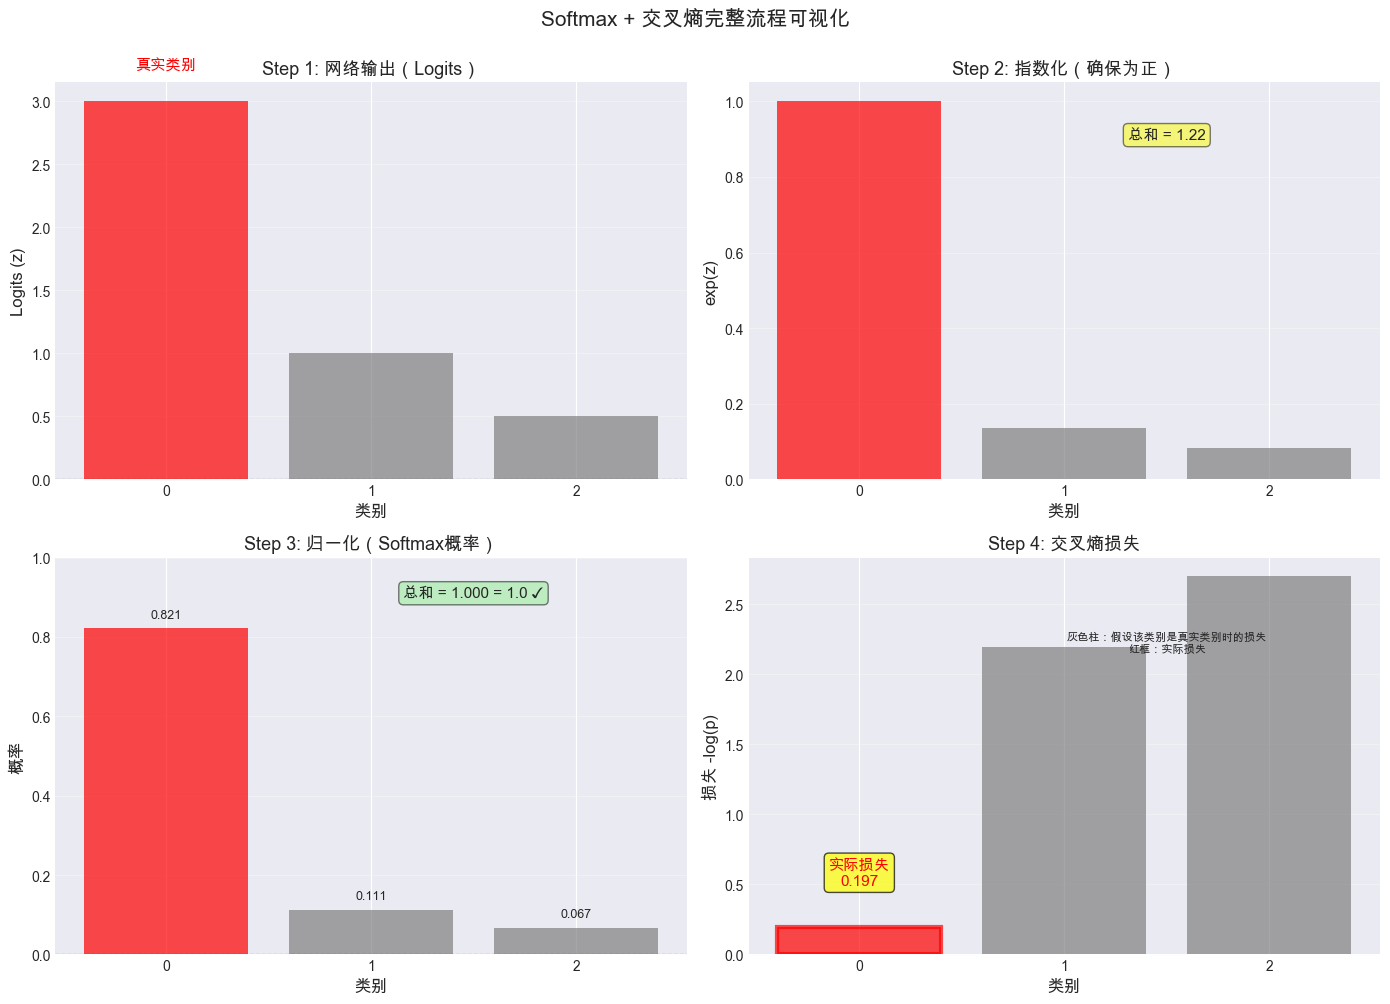

📊 详细计算步骤

输入 z: [3.  1.  0.5]
真实类别: 0

Step 1: Logits → Softmax
  exp(z): [1.         0.13533528 0.082085  ]
  sum(exp(z)): 1.2174
  softmax(z): [0.82140902 0.11116562 0.06742536]

Step 2: 预测概率
  类别0: 0.8214 ← 真实类别
  类别1: 0.1112
  类别2: 0.0674

Step 3: 交叉熵损失
  L = -log(p_0)
    = -log(0.8214)
    = 0.1967

💡 解释:
  预测概率0.82很高，损失0.20很小 ✓


【示例2：预测错误】



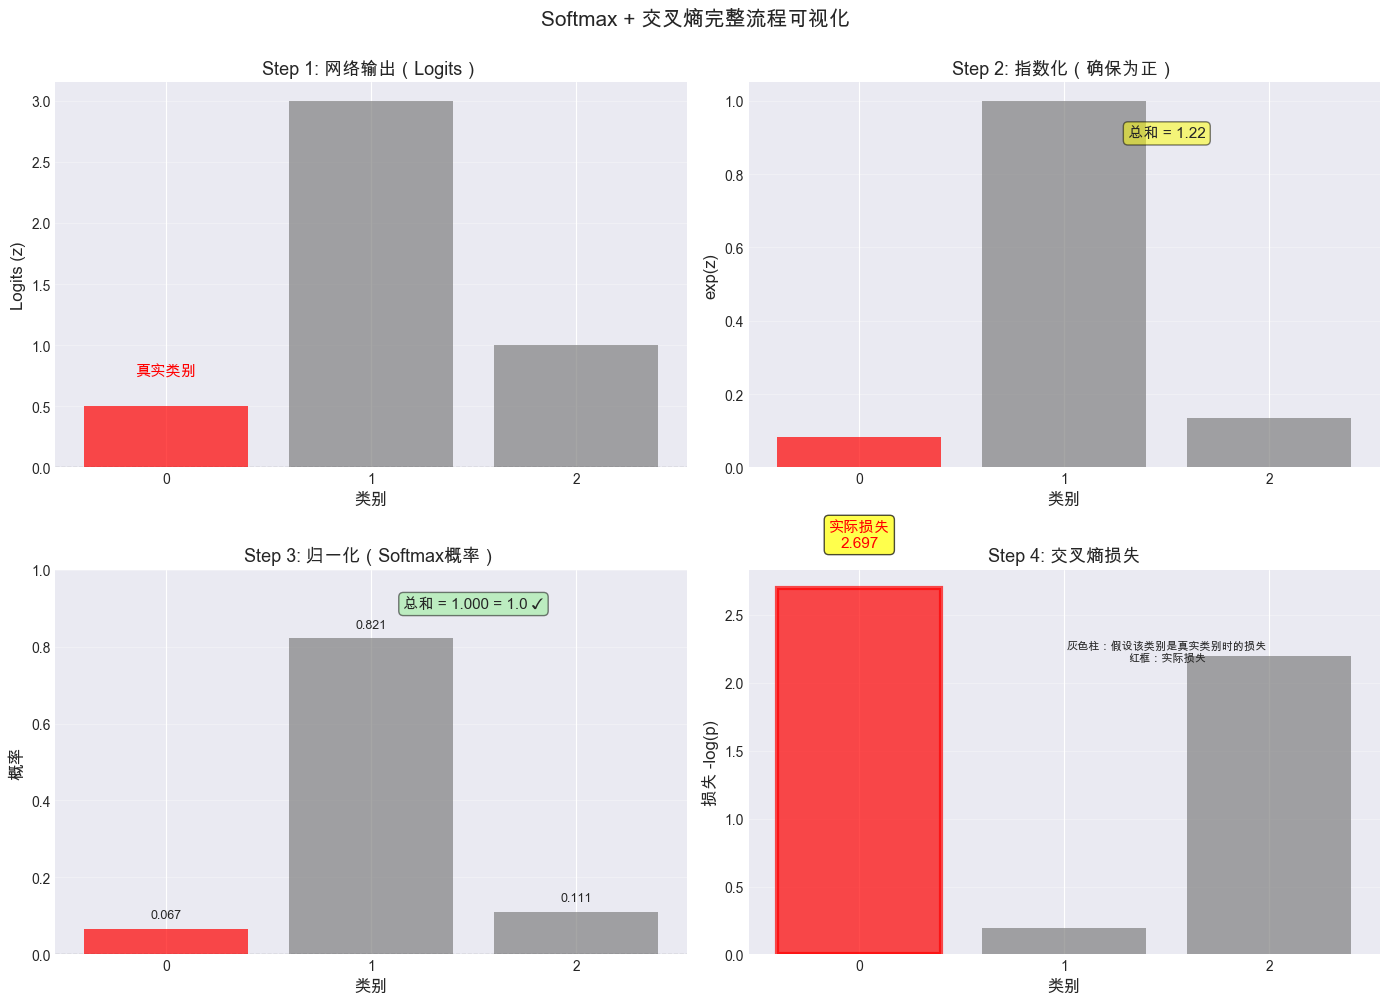

📊 详细计算步骤

输入 z: [0.5 3.  1. ]
真实类别: 0

Step 1: Logits → Softmax
  exp(z): [0.082085   1.         0.13533528]
  sum(exp(z)): 1.2174
  softmax(z): [0.06742536 0.82140902 0.11116562]

Step 2: 预测概率
  类别0: 0.0674 ← 真实类别
  类别1: 0.8214
  类别2: 0.1112

Step 3: 交叉熵损失
  L = -log(p_0)
    = -log(0.0674)
    = 2.6967

💡 解释:
  预测概率0.07很低，损失2.70很大 ❌


In [20]:
# 完整流程可视化函数
def visualize_softmax_cross_entropy(z, true_label):
    """
    可视化Softmax和交叉熵的完整流程
    
    参数:
        z: logits向量, shape (n_classes,)
        true_label: 真实类别索引
    """
    n_classes = len(z)
    
    # Step 1: 计算Softmax
    exp_z = np.exp(z - np.max(z))  # 数值稳定
    softmax_z = exp_z / np.sum(exp_z)
    
    # Step 2: 计算损失
    loss = -np.log(softmax_z[true_label] + 1e-15)
    
    # 创建可视化
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # ===== 左上：原始logits =====
    ax = axes[0, 0]
    colors = ['red' if i == true_label else 'gray' for i in range(n_classes)]
    bars = ax.bar(range(n_classes), z, color=colors, alpha=0.7)
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.set_xlabel('类别', fontsize=12)
    ax.set_ylabel('Logits (z)', fontsize=12)
    ax.set_title('Step 1: 网络输出（Logits）', fontsize=13, fontweight='bold')
    ax.set_xticks(range(n_classes))
    ax.grid(True, alpha=0.3, axis='y')
    # 标注真实类别
    ax.text(true_label, z[true_label] + (np.max(z)-np.min(z))*0.1, '真实类别',
            ha='center', fontsize=11, color='red', fontweight='bold')
    
    # ===== 右上：指数化 =====
    ax = axes[0, 1]
    bars = ax.bar(range(n_classes), exp_z, color=colors, alpha=0.7)
    ax.set_xlabel('类别', fontsize=12)
    ax.set_ylabel('exp(z)', fontsize=12)
    ax.set_title('Step 2: 指数化（确保为正）', fontsize=13, fontweight='bold')
    ax.set_xticks(range(n_classes))
    ax.grid(True, alpha=0.3, axis='y')
    # 标注总和
    ax.text(n_classes/2, np.max(exp_z)*0.9,
            f'总和 = {np.sum(exp_z):.2f}',
            ha='center', fontsize=11, bbox=dict(boxstyle='round',
            facecolor='yellow', alpha=0.5))
    
    # ===== 左下：Softmax概率 =====
    ax = axes[1, 0]
    bars = ax.bar(range(n_classes), softmax_z, color=colors, alpha=0.7)
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.set_xlabel('类别', fontsize=12)
    ax.set_ylabel('概率', fontsize=12)
    ax.set_title('Step 3: 归一化（Softmax概率）', fontsize=13, fontweight='bold')
    ax.set_xticks(range(n_classes))
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3, axis='y')
    # 在每个柱子上标注概率
    for i, (bar, prob) in enumerate(zip(bars, softmax_z)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{prob:.3f}', ha='center', va='bottom', fontsize=9)
    # 标注总和=1
    ax.text(n_classes/2, 0.9,
            f'总和 = {np.sum(softmax_z):.3f} = 1.0 ✓',
            ha='center', fontsize=11, bbox=dict(boxstyle='round',
            facecolor='lightgreen', alpha=0.5))
    
    # ===== 右下：交叉熵损失 =====
    ax = axes[1, 1]
    # 计算每个类别的损失（假设它是真实类别）
    hypothetical_losses = -np.log(softmax_z + 1e-15)
    bars = ax.bar(range(n_classes), hypothetical_losses,
                  color=colors, alpha=0.7)
    # 高亮真实类别的损失
    bars[true_label].set_edgecolor('red')
    bars[true_label].set_linewidth(3)
    
    ax.set_xlabel('类别', fontsize=12)
    ax.set_ylabel('损失 -log(p)', fontsize=12)
    ax.set_title('Step 4: 交叉熵损失', fontsize=13, fontweight='bold')
    ax.set_xticks(range(n_classes))
    ax.grid(True, alpha=0.3, axis='y')
    
    # 标注真实损失
    ax.text(true_label, loss + 0.3,
            f'实际损失\n{loss:.3f}',
            ha='center', fontsize=11, color='red', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    
    # 标注其他类别（假设情况）
    ax.text(n_classes/2, np.max(hypothetical_losses)*0.8,
            '灰色柱：假设该类别是真实类别时的损失\n红框：实际损失',
            ha='center', fontsize=8, style='italic')
    
    plt.suptitle('Softmax + 交叉熵完整流程可视化',
                 fontsize=15, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
    
    # 打印详细信息
    print("="*70)
    print("📊 详细计算步骤")
    print("="*70)
    print(f"\n输入 z: {z}")
    print(f"真实类别: {true_label}")
    print(f"\nStep 1: Logits → Softmax")
    print(f"  exp(z): {exp_z}")
    print(f"  sum(exp(z)): {np.sum(exp_z):.4f}")
    print(f"  softmax(z): {softmax_z}")
    print(f"\nStep 2: 预测概率")
    for i in range(n_classes):
        marker = " ← 真实类别" if i == true_label else ""
        print(f"  类别{i}: {softmax_z[i]:.4f}{marker}")
    print(f"\nStep 3: 交叉熵损失")
    print(f"  L = -log(p_{true_label})")
    print(f"    = -log({softmax_z[true_label]:.4f})")
    print(f"    = {loss:.4f}")
    print(f"\n💡 解释:")
    if softmax_z[true_label] > 0.8:
        print(f"  预测概率{softmax_z[true_label]:.2f}很高，损失{loss:.2f}很小 ✓")
    elif softmax_z[true_label] > 0.5:
        print(f"  预测概率{softmax_z[true_label]:.2f}中等，损失{loss:.2f}中等")
    else:
        print(f"  预测概率{softmax_z[true_label]:.2f}很低，损失{loss:.2f}很大 ❌")
    print("="*70)


# 示例1：预测正确的情况
print("【示例1：预测正确】\n")
z1_viz = np.array([3.0, 1.0, 0.5])  # 类别0的logit最大
visualize_softmax_cross_entropy(z1_viz, true_label=0)

print("\n" + "="*70 + "\n")

# 示例2：预测错误的情况
print("【示例2：预测错误】\n")
z2_viz = np.array([0.5, 3.0, 1.0])  # 类别1的logit最大，但真实是0
visualize_softmax_cross_entropy(z2_viz, true_label=0)

### 5.4 多分类方案对比总结

让我们总结一下前面学到的内容，对比不同的多分类方案：

| 方案 | 输出范围 | 总和 | 类别独立性 | 适用场景 | 推荐度 |
|-----|---------|------|-----------|---------|--------|
| **原始Logits** | $(-\infty, \infty)$ | 任意 | 独立 | ❌ 不能用 | ⭐ |
| **多个Sigmoid** | $(0, 1)$ | $\neq 1$ | 独立 | 多标签分类 | ⭐⭐ |
| **Softmax** | $(0, 1)$ | $= 1$ | 互斥 | ✅ 多分类 | ⭐⭐⭐⭐⭐ |
| **Argmax** | $\{0, 1\}$ | $= 1$ | 互斥 | 推理阶段 | ⭐⭐⭐⭐ |

#### 关键区别解释

**1. 多标签 vs 多分类**

- **多标签（Multi-label）**：
  - 一个样本可以属于多个类别
  - 例：一张图片包含"猫"和"狗"
  - 使用多个Sigmoid，每个类别独立
  
- **多分类（Multi-class）**：
  - 一个样本只属于一个类别
  - 例：一张图片是"猫"或"狗"
  - 使用Softmax，类别之间竞争

**2. Softmax vs Argmax**

- **Softmax**：
  - 输出概率分布：`[0.6, 0.3, 0.1]`
  - 保留不确定性，用于训练
  
- **Argmax**：
  - 输出硬标签：`[1, 0, 0]`
  - 只选最大值，用于推理

#### 总结

对于**多分类问题**：
1. ✅ 输出层使用**Softmax**激活函数
2. ✅ 损失函数使用**交叉熵损失**
3. ✅ 训练时输出概率分布，推理时用Argmax选择最大概率的类别

这是深度学习中多分类任务的标准做法！

---

---

### 5.3 常见疑问解答（FAQ）

#### ❓ Q1: one-hot编码是什么？为什么需要？

**普通标签（类别索引）**：
```python
y = 2  # 类别索引
```

**one-hot编码（向量）**：
```python
y = [0, 0, 1, 0, 0]  # 只有第2个位置是1
```

**为什么需要？**
- 交叉熵公式 $L = -\sum y_i \log(\hat{y}_i)$ 需要向量形式
- one-hot编码让公式中只有真实类别的项保留，其他项为0
- 简化计算：$L = -\log(\hat{y}_c)$（$c$是真实类别索引）

**在代码中**：
```python
# 方法1：手动one-hot编码
y_onehot = np.zeros(n_classes)
y_onehot[true_label] = 1

# 方法2：直接用索引（更高效）
loss = -np.log(y_pred[true_label])
```

两种方法**完全等价**！

#### ❓ Q2: 为什么Softmax要减去最大值（数值稳定性）？

**问题**：
```python
z = [1000, 999, 998]
exp_z = np.exp(z)  # [inf, inf, inf] ❌ 溢出！
```

**解决方案**：减去最大值
```python
z_shifted = z - np.max(z)  # [0, -1, -2]
exp_z = np.exp(z_shifted)  # [1.0, 0.37, 0.14] ✓
```

**为什么有效？**

数学上可以证明：
$$\frac{e^{z_i}}{\sum_j e^{z_j}} = \frac{e^{z_i - c}}{\sum_j e^{z_j - c}}$$

减去常数 $c$（通常选最大值）不改变结果，但避免了指数溢出。

#### ❓ Q3: 多标签分类 vs 多分类有什么区别？

**多分类（Multi-class）**：
- 一个样本**只属于一个**类别
- 例子：一张图片是"猫"**或**"狗"**或**"鸟"
- 使用：Softmax + 交叉熵
- 输出总和 = 1

**多标签分类（Multi-label）**：
- 一个样本可以属于**多个**类别
- 例子：一张图片包含"猫"**和**"狗"**和**"树"
- 使用：多个Sigmoid + 二元交叉熵
- 每个类别独立预测

**对比**：
| 特性 | 多分类 | 多标签 |
|-----|--------|--------|
| 激活函数 | Softmax | Sigmoid |
| 类别关系 | 互斥 | 独立 |
| 输出总和 | =1 | 任意 |
| 损失函数 | 交叉熵 | 二元交叉熵 |

#### ❓ Q4: Softmax vs Argmax 有什么区别？

**Softmax**：
- 输出概率分布：`[0.6, 0.3, 0.1]`
- 保留不确定性
- 用于**训练**时计算损失

**Argmax**：
- 输出硬标签（one-hot）：`[1, 0, 0]`
- 只选最大值
- 用于**推理**时做最终预测

**示例**：
```python
z = [2.1, 1.5, 0.8]

# Softmax（训练时）
probs = softmax(z)  # [0.52, 0.33, 0.15]

# Argmax（推理时）
prediction = np.argmax(probs)  # 0（类别0）
```

---

#### 🎬 完整流程可视化

让我们用一个交互式可视化来展示从**Logits** → **Softmax** → **交叉熵损失**的完整流程：

---

In [21]:
# 完整示例：3分类问题的交叉熵计算

print("="*70)
print("🧮 完整示例：3分类任务（猫、狗、鸟）")
print("="*70)

# 示例1：预测正确
print("\n【示例1：预测正确的情况】")
print("-"*70)
z1 = np.array([3.0, 1.0, 0.5])  # logits
true_label1 = 0  # 真实类别：猫（索引0）

# Step 1: Softmax
y_pred1 = softmax(z1)
print(f"1. 网络输出 z = {z1}")
print(f"2. 真实类别: 猫（类别{true_label1}）")
print(f"3. Softmax转换:")
print(f"   softmax(z) = {y_pred1}")
print(f"   → 预测猫的概率: {y_pred1[0]:.4f}")
print(f"   → 预测狗的概率: {y_pred1[1]:.4f}")
print(f"   → 预测鸟的概率: {y_pred1[2]:.4f}")

# Step 2: 交叉熵损失（方法1：one-hot）
y_true1_onehot = np.array([1, 0, 0])  # 猫的one-hot编码
loss1_method1 = -np.sum(y_true1_onehot * np.log(y_pred1))
print(f"\n4. 交叉熵损失（方法1：one-hot）:")
print(f"   L = -Σ y_i × log(ŷ_i)")
print(f"     = -(1×log({y_pred1[0]:.4f}) + 0×log({y_pred1[1]:.4f}) + 0×log({y_pred1[2]:.4f}))")
print(f"     = -log({y_pred1[0]:.4f})")
print(f"     = {loss1_method1:.4f}")

# 方法2：直接索引
loss1_method2 = -np.log(y_pred1[true_label1])
print(f"\n5. 交叉熵损失（方法2：直接索引）:")
print(f"   L = -log(ŷ_真实类别)")
print(f"     = -log(ŷ_{true_label1})")
print(f"     = {loss1_method2:.4f}")

print(f"\n   ✅ 两种方法结果相同！")
print(f"   💡 预测概率{y_pred1[0]:.2f}很高 → 损失{loss1_method1:.2f}很小")

# 示例2：预测错误
print("\n" + "="*70)
print("【示例2：预测错误的情况】")
print("-"*70)
z2 = np.array([0.5, 3.0, 1.0])  # logits（狗的分数最高）
true_label2 = 0  # 真实类别：还是猫

# Softmax
y_pred2 = softmax(z2)
print(f"1. 网络输出 z = {z2}")
print(f"2. 真实类别: 猫（类别{true_label2}）")
print(f"3. Softmax转换:")
print(f"   softmax(z) = {y_pred2}")
print(f"   → 预测猫的概率: {y_pred2[0]:.4f} ❌ 很低！")
print(f"   → 预测狗的概率: {y_pred2[1]:.4f} ← 最大（但预测错了）")
print(f"   → 预测鸟的概率: {y_pred2[2]:.4f}")

# 损失
loss2 = -np.log(y_pred2[true_label2])
print(f"\n4. 交叉熵损失:")
print(f"   L = -log(ŷ_{true_label2})")
print(f"     = -log({y_pred2[0]:.4f})")
print(f"     = {loss2:.4f}")

print(f"\n   ❌ 预测概率{y_pred2[0]:.2f}很低 → 损失{loss2:.2f}很大")

# 对比
print("\n" + "="*70)
print("📊 对比总结")
print("="*70)
print(f"\n{'场景':<15} {'预测概率':<12} {'损失':<10} {'解释':<20}")
print("-"*70)
print(f"{'预测正确':<15} {y_pred1[0]:<12.4f} {loss1_method1:<10.4f} {'损失小 ✓':<20}")
print(f"{'预测错误':<15} {y_pred2[0]:<12.4f} {loss2:<10.4f} {'损失大 ❌':<20}")
print(f"\n损失增加了: {loss2/loss1_method1:.1f} 倍！")
print("\n💡 这就是交叉熵的惩罚机制：错误预测会受到严厉惩罚。")
print("="*70)

🧮 完整示例：3分类任务（猫、狗、鸟）

【示例1：预测正确的情况】
----------------------------------------------------------------------
1. 网络输出 z = [3.  1.  0.5]
2. 真实类别: 猫（类别0）
3. Softmax转换:
   softmax(z) = [0.82140902 0.11116562 0.06742536]
   → 预测猫的概率: 0.8214
   → 预测狗的概率: 0.1112
   → 预测鸟的概率: 0.0674

4. 交叉熵损失（方法1：one-hot）:
   L = -Σ y_i × log(ŷ_i)
     = -(1×log(0.8214) + 0×log(0.1112) + 0×log(0.0674))
     = -log(0.8214)
     = 0.1967

5. 交叉熵损失（方法2：直接索引）:
   L = -log(ŷ_真实类别)
     = -log(ŷ_0)
     = 0.1967

   ✅ 两种方法结果相同！
   💡 预测概率0.82很高 → 损失0.20很小

【示例2：预测错误的情况】
----------------------------------------------------------------------
1. 网络输出 z = [0.5 3.  1. ]
2. 真实类别: 猫（类别0）
3. Softmax转换:
   softmax(z) = [0.06742536 0.82140902 0.11116562]
   → 预测猫的概率: 0.0674 ❌ 很低！
   → 预测狗的概率: 0.8214 ← 最大（但预测错了）
   → 预测鸟的概率: 0.1112

4. 交叉熵损失:
   L = -log(ŷ_0)
     = -log(0.0674)
     = 2.6967

   ❌ 预测概率0.07很低 → 损失2.70很大

📊 对比总结

场景              预测概率         损失         解释                  
------------------------------------------

#### 📐 完整的交叉熵公式

**单样本的交叉熵损失**：

对于K分类问题，给定：
- 真实标签：$\mathbf{y} = [y_1, y_2, \ldots, y_K]$（one-hot编码）
- 预测概率：$\hat{\mathbf{y}} = [\hat{y}_1, \hat{y}_2, \ldots, \hat{y}_K]$（Softmax输出）

交叉熵损失为：
$$L = -\sum_{i=1}^{K} y_i \log(\hat{y}_i)$$

**为什么one-hot编码能简化公式？**

因为 $y_i$ 只有一个位置为1（真实类别），其余都是0。所以：

$$L = -\sum_{i=1}^{K} y_i \log(\hat{y}_i) = -\log(\hat{y}_c)$$

其中 $c$ 是真实类别的索引。

**两种计算方式等价**：
- 方法1：用one-hot编码向量计算
- 方法2：直接用类别索引 $c$ 计算

让我们通过具体例子理解...

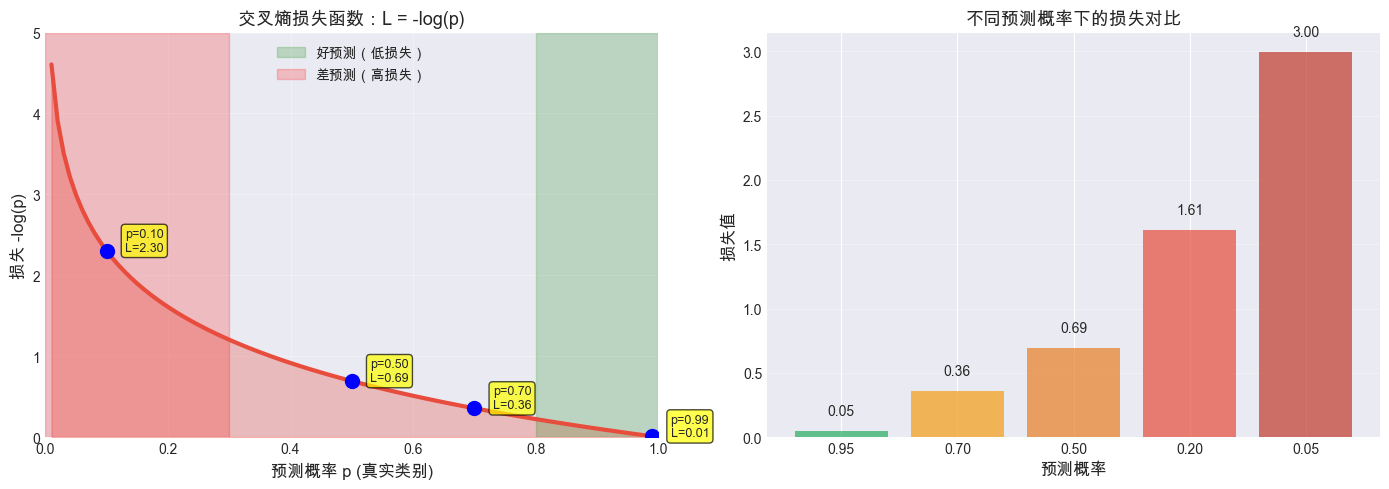


🔍 观察要点：
  - 左图：p=1时损失=0（完美预测）
  - 左图：p→0时损失→∞（严重惩罚错误）
  - 右图：预测概率从0.95降到0.05，损失呈指数增长
  - 这就是交叉熵的"惩罚机制"：错误预测受到严厉惩罚！


In [22]:
# 可视化 -log(p) 曲线
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左图：-log(p)曲线
ax = axes[0]
p_range = np.linspace(0.01, 1, 100)
loss_range = -np.log(p_range)

ax.plot(p_range, loss_range, linewidth=3, color='#e74c3c')
ax.fill_between(p_range, loss_range, alpha=0.3, color='#e74c3c')

# 标注关键点
key_points = [(0.99, -np.log(0.99)), (0.70, -np.log(0.70)), 
              (0.50, -np.log(0.50)), (0.10, -np.log(0.10))]
for p, loss in key_points:
    ax.plot(p, loss, 'o', markersize=10, color='blue')
    ax.text(p + 0.03, loss, f'p={p:.2f}\nL={loss:.2f}', 
            fontsize=9, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax.set_xlabel('预测概率 p (真实类别)', fontsize=12)
ax.set_ylabel('损失 -log(p)', fontsize=12)
ax.set_title('交叉熵损失函数：L = -log(p)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 5)

# 标注区域
ax.axvspan(0.8, 1, alpha=0.2, color='green', label='好预测（低损失）')
ax.axvspan(0, 0.3, alpha=0.2, color='red', label='差预测（高损失）')
ax.legend(fontsize=10)

# 右图：柱状图对比
ax = axes[1]
probs_examples = [0.95, 0.70, 0.50, 0.20, 0.05]
losses_examples = [-np.log(p) for p in probs_examples]
colors_gradient = ['#27ae60', '#f39c12', '#e67e22', '#e74c3c', '#c0392b']

bars = ax.bar(range(len(probs_examples)), losses_examples, color=colors_gradient, alpha=0.7)
ax.set_xlabel('预测概率', fontsize=12)
ax.set_ylabel('损失值', fontsize=12)
ax.set_title('不同预测概率下的损失对比', fontsize=13, fontweight='bold')
ax.set_xticks(range(len(probs_examples)))
ax.set_xticklabels([f'{p:.2f}' for p in probs_examples])
ax.grid(True, alpha=0.3, axis='y')

# 标注数值
for i, (bar, loss) in enumerate(zip(bars, losses_examples)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{loss:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🔍 观察要点：")
print("  - 左图：p=1时损失=0（完美预测）")
print("  - 左图：p→0时损失→∞（严重惩罚错误）")
print("  - 右图：预测概率从0.95降到0.05，损失呈指数增长")
print("  - 这就是交叉熵的\"惩罚机制\"：错误预测受到严厉惩罚！")

In [ ]:
# 展示不同预测概率下的损失
probabilities = np.array([0.99, 0.90, 0.70, 0.50, 0.30, 0.10, 0.01])
losses = -np.log(probabilities)

print("="*70)
print("📊 预测概率 vs 损失值对照表")
print("="*70)
print(f"\n{'预测概率 p':<15} {'损失 -log(p)':<15} {'解释':<30}")
print("-"*70)
for p, loss in zip(probabilities, losses):
    if p >= 0.9:
        status = "非常确信，损失很小 ✓"
    elif p >= 0.7:
        status = "比较确信，损失较小"
    elif p >= 0.5:
        status = "不太确定，损失中等"
    elif p >= 0.3:
        status = "预测可能错了，损失较大"
    else:
        status = "预测大错，损失很大 ❌"
    print(f"{p:<15.2f} {loss:<15.2f} {status:<30}")

print("\n💡 关键特性：")
print("  1. p越接近1（预测正确），损失越接近0")
print("  2. p越接近0（预测错误），损失趋向无穷大")
print("  3. 损失随着错误程度呈指数增长（惩罚错误）")
print("="*70)

### 5.2.1 交叉熵损失的直观理解

现在我们有了Softmax输出的概率，如何衡量预测的好坏呢？这就需要**损失函数**。

#### 🎯 什么是"损失函数"？

损失函数衡量"预测有多差"：
- 预测正确 → 损失小（接近0）
- 预测错误 → 损失大

对于分类问题，我们使用**交叉熵损失**（Cross-Entropy Loss）。

#### 🤔 为什么用 $-\log(p)$？

假设真实类别是"猫"，模型预测该类别的概率为 $p_{\text{猫}}$。

让我们看看不同预测概率下的损失：

### 5.1.1 Softmax公式的逐步推导

现在我们理解了为什么需要Softmax，让我们看看它的公式是怎么来的。

**目标**：将任意实数向量 $\mathbf{z} = [z_1, z_2, \ldots, z_K]$ 转换为概率分布 $\mathbf{p} = [p_1, p_2, \ldots, p_K]$

#### 推导步骤

**需求1：输出必须为正数**

概率必须 $\geq 0$，但logits可以是任意实数（包括负数）。

**解决方案**：使用指数函数 $e^z$
- $e^z > 0$ 对所有实数 $z$ 成立
- $e^z$ 单调递增：$z_i > z_j \Rightarrow e^{z_i} > e^{z_j}$（保持顺序）

$$a_i = e^{z_i}$$

**需求2：总和必须为1（归一化为概率分布）**

现在我们有正数 $a_i = e^{z_i}$，但它们的和通常不等于1。

**解决方案**：除以总和
$$p_i = \frac{a_i}{\sum_{j=1}^{K} a_j} = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

**这就是Softmax公式！**

$$\text{softmax}(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

#### 为什么用 $e$（自然指数）？

1. **数学性质好**：$\frac{d}{dz}e^z = e^z$（导数就是自己，方便求导）
2. **指数增长**：大的 $z_i$ 获得远大于小的 $z_j$ 的概率（"强者更强"效应）
3. **普遍性**：$e$ 是数学中最自然的底数

---

In [ ]:
# 可视化对比三种方案
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

categories = np.arange(10)

# 方案1：原始logits
ax = axes[0]
bars = ax.bar(categories, z, color='gray', alpha=0.7)
ax.axhline(1, color='red', linestyle='--', linewidth=2, label='概率=1的线')
ax.set_xlabel('类别', fontsize=12)
ax.set_ylabel('数值', fontsize=12)
ax.set_title('❌ 方案1：原始Logits\n（总和≠1，不是概率）', fontsize=12, fontweight='bold')
ax.set_xticks(categories)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
# 标注总和
ax.text(5, np.max(z)*0.9, f'总和 = {np.sum(z):.2f}', 
        ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# 方案2：Sigmoid
ax = axes[1]
bars = ax.bar(categories, probs_sigmoid, color='orange', alpha=0.7)
ax.axhline(1, color='red', linestyle='--', linewidth=2, label='概率=1的线')
ax.set_xlabel('类别', fontsize=12)
ax.set_ylabel('Sigmoid输出', fontsize=12)
ax.set_title('❌ 方案2：多个Sigmoid\n（总和≠1，无竞争）', fontsize=12, fontweight='bold')
ax.set_xticks(categories)
ax.set_ylim(0, 1.2)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
# 标注总和
ax.text(5, 1.1, f'总和 = {np.sum(probs_sigmoid):.2f}', 
        ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# 方案3：Softmax
ax = axes[2]
bars = ax.bar(categories, probs_softmax, color='green', alpha=0.7)
# 高亮最大值
max_idx = np.argmax(probs_softmax)
bars[max_idx].set_color('darkgreen')
bars[max_idx].set_edgecolor('red')
bars[max_idx].set_linewidth(3)
ax.set_xlabel('类别', fontsize=12)
ax.set_ylabel('概率', fontsize=12)
ax.set_title('✅ 方案3：Softmax\n（总和=1，有竞争机制）', fontsize=12, fontweight='bold')
ax.set_xticks(categories)
ax.set_ylim(0, 0.5)
ax.grid(True, alpha=0.3, axis='y')
# 标注总和
ax.text(5, 0.45, f'总和 = {np.sum(probs_softmax):.4f} = 1.0 ✓', 
        ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
# 标注最大值
ax.text(max_idx, probs_softmax[max_idx] + 0.02, '最大概率', 
        ha='center', fontsize=10, color='red', fontweight='bold')

plt.suptitle('三种方案对比：如何将Logits转换为概率？', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 观察要点：")
print("  1. Sigmoid：每个类别独立计算，总和远大于1")
print("  2. Softmax：类别之间竞争，总和恰好等于1")
print("  3. Softmax让最大的logit获得最大的概率（红框标注）")

In [ ]:
# 对比不同方案
z = np.array([2.1, 0.5, 3.2, 1.0, 0.8, 1.5, 0.3, 2.8, 1.2, 0.9])

print("="*70)
print("❌ 方案1：直接使用logits作为概率")
print("="*70)
print(f"z = {z}")
print(f"\n问题:")
print(f"  - 可以是负数吗？可以（例如z可以是[-1, 2, 3]）")
print(f"  - 总和等于1吗？{np.sum(z):.2f} ≠ 1")
print(f"  - 可以解释为概率吗？❌ 不能\n")

print("="*70)
print("❌ 方案2：对每个输出使用Sigmoid")  
print("="*70)
probs_sigmoid = sigmoid(z)
print(f"sigmoid(z) = {probs_sigmoid}")
print(f"\n分析:")
print(f"  ✓ 所有值都在[0,1]之间")
print(f"  ✗ 总和 = {np.sum(probs_sigmoid):.2f} ≠ 1（不是概率分布！）")
print(f"  ✗ 各类别独立，没有\"竞争\"")
print(f"  ✗ 多个类别都可能有高概率（混乱）\n")

print("="*70)
print("✅ 方案3：Softmax")
print("="*70)
probs_softmax = softmax(z)
print(f"softmax(z) = {probs_softmax}")
print(f"\n分析:")
print(f"  ✓ 所有值都在[0,1]之间")
print(f"  ✓ 总和 = {np.sum(probs_softmax):.4f} ≈ 1（完美！）")
print(f"  ✓ 类别之间有\"竞争\"：最大的z得到最大的概率")
print(f"    - z[2]=3.2是最大 → softmax(z)[2]={probs_softmax[2]:.3f}是最大概率")
print(f"  ✓ 可以解释为概率分布\n")

print("💡 结论: Softmax是多分类问题的正确选择！")

---

## 5. Softmax与多分类

### 5.0 为什么需要Softmax？

在学习Softmax之前，让我们先理解**为什么需要它**。

#### 🤔 多分类问题的困境

假设我们要识别手写数字（0-9，共10类），神经网络最后一层输出10个数字（称为**logits**）：

```
z = [2.1, 0.5, 3.2, 1.0, 0.8, 1.5, 0.3, 2.8, 1.2, 0.9]
```

**问题：如何将这些数字转换为"类别概率"？**

我们需要概率满足：
1. 每个值都在 $[0, 1]$ 之间
2. 所有概率加起来等于 $1$
3. 概率大小反映预测的信心

让我们尝试不同的方案...

---

## 5. Softmax与多分类

### 5.1 Softmax函数

**定义：**

对于输出向量 $\mathbf{z} = [z_1, z_2, \ldots, z_K]^T$，Softmax将其转换为概率分布：

$$\text{softmax}(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

**性质：**
- 每个输出在 $(0, 1)$ 之间
- 所有输出之和为 $1$（概率分布）
- 保持顺序：$z_i > z_j \Rightarrow \text{softmax}(z)_i > \text{softmax}(z)_j$

**数值稳定技巧：**

为避免指数溢出，减去最大值：

$$\text{softmax}(\mathbf{z})_i = \frac{e^{z_i - \max(\mathbf{z})}}{\sum_{j=1}^{K} e^{z_j - \max(\mathbf{z})}}$$

---

In [16]:
# 从零实现Softmax

def softmax(z):
    """
    Softmax激活函数
    
    公式: softmax(z)_i = exp(z_i) / sum(exp(z_j))
    
    参数:
        z: 输入向量或矩阵
           - 如果是向量 (n_classes,)，直接计算
           - 如果是矩阵 (n_samples, n_classes)，对每行计算
    
    返回:
        概率分布，形状与z相同
    """
    # 数值稳定技巧: 减去最大值
    # 这不会改变结果，但避免exp溢出
    if z.ndim == 1:
        # 单个样本
        z_shifted = z - np.max(z)
        exp_z = np.exp(z_shifted)
        return exp_z / np.sum(exp_z)
    else:
        # 批量样本
        z_shifted = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_shifted)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)


# 测试Softmax
z_test = np.array([1.0, 2.0, 3.0])
probs = softmax(z_test)

print("输入 z:", z_test)
print("Softmax(z):", probs)
print("概率之和:", np.sum(probs))

# 批量测试
z_batch = np.array([
    [1.0, 2.0, 3.0],
    [0.5, 1.5, 0.5]
])
probs_batch = softmax(z_batch)

print("\n批量输入 z:")
print(z_batch)
print("\nSoftmax(z):")
print(probs_batch)
print("\n每行概率之和:", np.sum(probs_batch, axis=1))

print("\n✅ Softmax函数实现完成！")

输入 z: [1. 2. 3.]
Softmax(z): [0.09003057 0.24472847 0.66524096]
概率之和: 0.9999999999999999

批量输入 z:
[[1.  2.  3. ]
 [0.5 1.5 0.5]]

Softmax(z):
[[0.09003057 0.24472847 0.66524096]
 [0.21194156 0.57611688 0.21194156]]

每行概率之和: [1. 1.]

✅ Softmax函数实现完成！


### 5.2 交叉熵损失函数

**定义：**

对于多分类问题，使用**交叉熵损失**（Cross-Entropy Loss）：

$$L = -\sum_{i=1}^{K} y_i \log(\hat{y}_i)$$

其中：
- $y_i$: 真实标签的one-hot编码
- $\hat{y}_i$: Softmax输出的预测概率

**简化（单样本）：**

如果真实类别是 $c$，则：

$$L = -\log(\hat{y}_c)$$

**批量数据：**

$$L = -\frac{1}{N}\sum_{n=1}^{N}\sum_{i=1}^{K} y_{n,i} \log(\hat{y}_{n,i})$$

---

In [23]:
# 从零实现交叉熵损失

def cross_entropy_loss(y_true, y_pred):
    """
    交叉熵损失函数
    
    公式: L = -sum(y_true * log(y_pred))
    
    参数:
        y_true: 真实标签，可以是：
                - one-hot编码 (n_samples, n_classes)
                - 类别索引 (n_samples,)
        y_pred: 预测概率 (n_samples, n_classes)
    
    返回:
        损失值（标量）
    """
    n_samples = y_pred.shape[0]
    
    # 添加小常数避免log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    # 如果y_true是类别索引（1D数组）
    if y_true.ndim == 1:
        # 直接索引对应类别的预测概率
        # 示例: y_true = [0, 2, 1]
        # y_pred = [[0.7, 0.2, 0.1],
        #           [0.1, 0.2, 0.7],
        #           [0.2, 0.6, 0.2]]
        # 取出 [0.7, 0.7, 0.6]
        correct_confidences = y_pred[np.arange(n_samples), y_true]
        loss = -np.mean(np.log(correct_confidences))
    else:
        # y_true是one-hot编码
        loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    
    return loss


# 测试交叉熵
y_true = np.array([0, 2, 1])  # 类别索引
y_pred = np.array([
    [0.7, 0.2, 0.1],  # 预测类0，正确
    [0.1, 0.2, 0.7],  # 预测类2，正确
    [0.2, 0.6, 0.2]   # 预测类1，正确
])

loss = cross_entropy_loss(y_true, y_pred)
print("真实标签:", y_true)
print("\n预测概率:")
print(y_pred)
print(f"\n交叉熵损失: {loss:.4f}")

# 测试错误预测
y_pred_wrong = np.array([
    [0.1, 0.2, 0.7],  # 预测错误
    [0.7, 0.2, 0.1],  # 预测错误
    [0.2, 0.2, 0.6]   # 预测错误
])

loss_wrong = cross_entropy_loss(y_true, y_pred_wrong)
print(f"\n错误预测的损失: {loss_wrong:.4f}")
print(f"损失增加了: {loss_wrong - loss:.4f}")

print("\n✅ 交叉熵损失实现完成！")

真实标签: [0 2 1]

预测概率:
[[0.7 0.2 0.1]
 [0.1 0.2 0.7]
 [0.2 0.6 0.2]]

交叉熵损失: 0.4081

错误预测的损失: 2.0715
损失增加了: 1.6635

✅ 交叉熵损失实现完成！


---

## 6. 实战项目1：二分类（鸢尾花数据集）

使用单层神经网络 + Sigmoid激活函数进行二分类。

---

In [24]:
# 加载鸢尾花数据集（只取2个类别）

iris = load_iris()
X = iris.data
y = iris.target

# 只选择类别0和类别1（线性可分）
mask = y < 2
X = X[mask]
y = y[mask]

# 只使用2个特征（便于可视化）
X = X[:, :2]  # 花萼长度和宽度

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("训练集大小:", X_train.shape)
print("测试集大小:", X_test.shape)
print("\n类别分布:")
print("  类别0:", np.sum(y_train == 0), "个样本")
print("  类别1:", np.sum(y_train == 1), "个样本")

训练集大小: (80, 2)
测试集大小: (20, 2)

类别分布:
  类别0: 38 个样本
  类别1: 42 个样本


In [25]:
# 从零实现单层二分类网络

class BinaryClassifier:
    """
    单层二分类神经网络
    
    结构: 输入层 → 输出层(1个神经元) → Sigmoid
    
    参数:
        n_features: 输入特征数
        learning_rate: 学习率
        n_iterations: 训练轮数
    """
    
    def __init__(self, n_features, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        
        # 初始化参数（小随机数）
        self.W = np.random.randn(n_features) * 0.01  # shape: (n_features,)
        self.b = 0.0  # 标量
        
        # 训练历史
        self.loss_history = []
    
    def forward(self, X):
        """
        前向传播
        
        参数:
            X: 输入数据, shape (n_samples, n_features)
        
        返回:
            y_pred: 预测概率, shape (n_samples,)
        """
        # 线性变换: z = X @ W + b
        z = X @ self.W + self.b  # shape: (n_samples,)
        
        # Sigmoid激活
        y_pred = sigmoid(z)  # shape: (n_samples,)
        
        return y_pred
    
    def compute_loss(self, y_true, y_pred):
        """
        计算二分类交叉熵损失
        
        公式: L = -[y*log(y_pred) + (1-y)*log(1-y_pred)]
        """
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        loss = -np.mean(
            y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
        )
        return loss
    
    def backward(self, X, y_true, y_pred):
        """
        反向传播计算梯度
        
        对于二分类+Sigmoid+交叉熵，梯度简化为:
        dL/dW = X^T @ (y_pred - y_true) / n_samples
        dL/db = mean(y_pred - y_true)
        """
        n_samples = X.shape[0]
        
        # 误差
        error = y_pred - y_true  # shape: (n_samples,)
        
        # 梯度
        grad_W = X.T @ error / n_samples  # shape: (n_features,)
        grad_b = np.mean(error)  # 标量
        
        return grad_W, grad_b
    
    def fit(self, X, y):
        """
        训练模型
        """
        for i in range(self.n_iterations):
            # 前向传播
            y_pred = self.forward(X)
            
            # 计算损失
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)
            
            # 反向传播
            grad_W, grad_b = self.backward(X, y, y_pred)
            
            # 更新参数（梯度下降）
            self.W -= self.learning_rate * grad_W
            self.b -= self.learning_rate * grad_b
            
            # 每100轮打印一次
            if (i + 1) % 100 == 0:
                acc = np.mean((y_pred >= 0.5).astype(int) == y)
                print(f"Epoch {i+1}/{self.n_iterations} - Loss: {loss:.4f} - Acc: {acc:.4f}")
    
    def predict_proba(self, X):
        """预测概率"""
        return self.forward(X)
    
    def predict(self, X):
        """预测类别"""
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)
    
    def score(self, X, y):
        """计算准确率"""
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


print("✅ 二分类网络类定义完成！")

✅ 二分类网络类定义完成！


In [26]:
# 训练模型

model = BinaryClassifier(
    n_features=X_train.shape[1],
    learning_rate=0.1,
    n_iterations=1000
)

print("开始训练...\n")
model.fit(X_train, y_train)

# 评估
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"\n训练集准确率: {train_acc:.4f}")
print(f"测试集准确率: {test_acc:.4f}")

开始训练...

Epoch 100/1000 - Loss: 0.1674 - Acc: 0.9875
Epoch 200/1000 - Loss: 0.1100 - Acc: 0.9875
Epoch 300/1000 - Loss: 0.0865 - Acc: 0.9875
Epoch 400/1000 - Loss: 0.0732 - Acc: 0.9875
Epoch 500/1000 - Loss: 0.0643 - Acc: 1.0000
Epoch 600/1000 - Loss: 0.0579 - Acc: 1.0000
Epoch 700/1000 - Loss: 0.0530 - Acc: 1.0000
Epoch 800/1000 - Loss: 0.0491 - Acc: 1.0000
Epoch 900/1000 - Loss: 0.0459 - Acc: 1.0000
Epoch 1000/1000 - Loss: 0.0432 - Acc: 1.0000

训练集准确率: 1.0000
测试集准确率: 1.0000


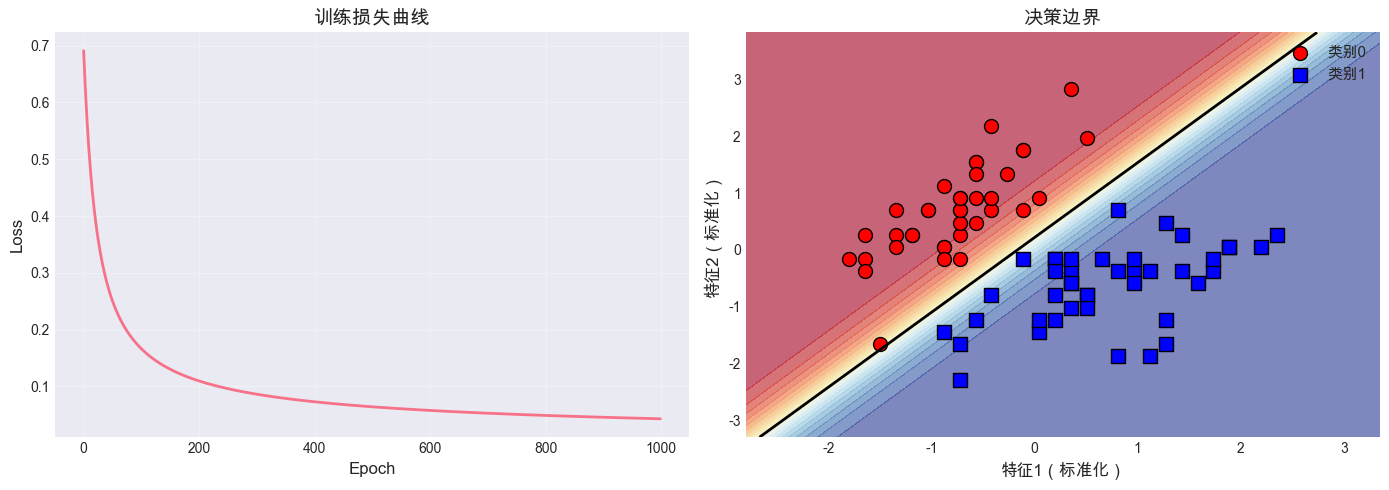

In [27]:
# 可视化训练过程和决策边界

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左图：损失曲线
axes[0].plot(model.loss_history, linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('训练损失曲线', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 右图：决策边界
ax = axes[1]

# 创建网格
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# 预测网格点
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制等高线（决策边界）
ax.contourf(xx, yy, Z, levels=20, alpha=0.6, cmap='RdYlBu')
ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# 绘制数据点
ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
          c='red', marker='o', s=100, edgecolors='black', label='类别0')
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
          c='blue', marker='s', s=100, edgecolors='black', label='类别1')

ax.set_xlabel('特征1（标准化）', fontsize=12)
ax.set_ylabel('特征2（标准化）', fontsize=12)
ax.set_title('决策边界', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 7. 本章总结

### 7.1 核心要点

✅ **单层神经网络模型**
- 线性变换: $\mathbf{z} = \mathbf{W}\mathbf{x} + \mathbf{b}$
- 非线性激活: $\mathbf{y} = f(\mathbf{z})$

✅ **激活函数的必要性**
- 没有激活函数 → 多层等价于单层
- 激活函数引入非线性 → 可以逼近复杂函数

✅ **常见激活函数**
- Sigmoid: 二分类输出层
- Tanh: RNN、LSTM
- ReLU: **隐藏层首选**
- Leaky ReLU/ELU: 避免Dead ReLU
- GELU: Transformer架构

✅ **多分类**
- Softmax: 将logits转换为概率分布
- 交叉熵损失: 多分类的标准损失函数

### 7.2 下一步

**接下来我们将学习：**
1. **多层感知机（MLP）** - 如何构建多层网络？
2. **前向传播** - 多层网络的计算流程
3. **解决XOR问题** - 多层网络的威力

---